# ДЗ 1. Exploration Data Analysis.
## Заглушка

### Импортируем необходимые библиотеки

In [1]:
from typing import List, Optional
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import scipy.stats as st
from scipy.stats import probplot, ks_2samp

from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted
import missingno as msno
import xgboost as xgb
%matplotlib inline

## Загружаем датасеты

In [2]:
train = pd.read_csv("assignment1_data/train.csv")
test = pd.read_csv("assignment1_data/test.csv")

print("train.shape = {} rows, {} cols".format(*train.shape))
print("test.shape = {} rows, {} cols".format(*test.shape))

train.shape = 200000 rows, 202 cols
test.shape = 200000 rows, 201 cols


In [9]:
pd.options.display.max_rows = 220

In [10]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
target,200000.0,0.100490,0.300653,0.0000,0.000000,0.00000,0.000000,1.0000
var_0,200000.0,10.679914,3.040051,0.4084,8.453850,10.52475,12.758200,20.3150
var_1,200000.0,-1.627622,4.050044,-15.0434,-4.740025,-1.60805,1.358625,10.3768
var_2,200000.0,10.715192,2.640894,2.1171,8.722475,10.58000,12.516700,19.3530
var_3,200000.0,6.796529,2.043319,-0.0402,5.254075,6.82500,8.324100,13.1883
var_4,200000.0,11.078333,1.623150,5.0748,9.883175,11.10825,12.261125,16.6714
var_5,200000.0,-5.065317,7.863267,-32.5626,-11.200350,-4.83315,0.924800,17.2516
var_6,200000.0,5.408949,0.866607,2.3473,4.767700,5.38510,6.003000,8.4477
var_7,200000.0,16.545850,3.418076,5.3497,13.943800,16.45680,19.102900,27.6918
var_8,200000.0,0.284162,3.332634,-10.5055,-2.317800,0.39370,2.937900,10.1513


In [11]:
test.describe().T.head(10)

,count,mean,std,min,25%,50%,75%,max
var_0,200000.0,10.658737,3.036716,0.1887,8.442975,10.51380,12.739600,22.3234
var_1,200000.0,-1.624244,4.040509,-15.0434,-4.700125,-1.59050,1.343400,9.3851
var_2,200000.0,10.707452,2.633888,2.3552,8.735600,10.56070,12.495025,18.7141
var_3,200000.0,6.788214,2.052724,-0.0224,5.230500,6.82235,8.327600,13.1420
var_4,200000.0,11.076399,1.616456,5.4844,9.891075,11.09975,12.253400,16.0371
var_5,200000.0,-5.050558,7.869293,-27.7670,-11.201400,-4.83410,0.942575,17.2537
var_6,200000.0,5.415164,0.864686,2.2164,4.772600,5.39160,6.005800,8.3025
var_7,200000.0,16.529143,3.424482,5.7137,13.933900,16.42270,19.094550,28.2928
var_8,200000.0,0.277135,3.333375,-9.9560,-2.303900,0.37200,2.930025,9.6655
var_9,200000.0,7.569407,1.231865,4.2433,6.623800,7.63200,8.584825,11.0036


In [3]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [7]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


## Анализ пропусков

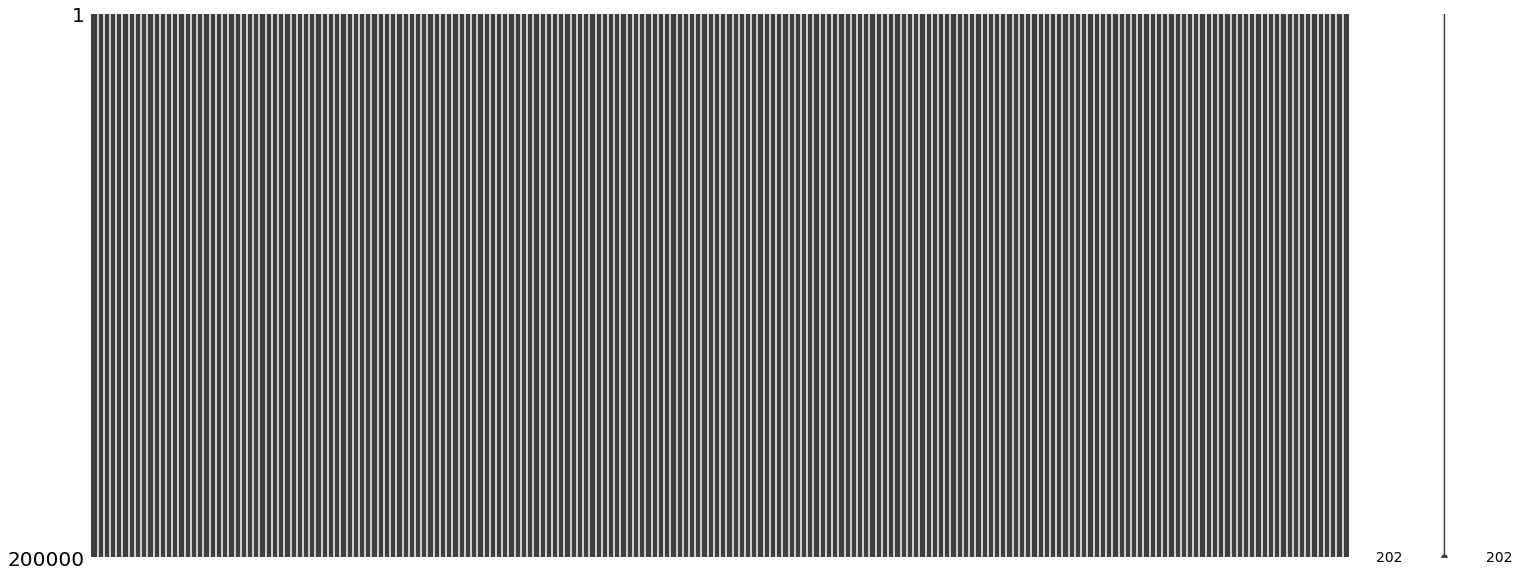

In [6]:
msno.matrix(train)

In [14]:
train_features_with_na = [
    feature for feature in train.columns
    if train[feature].isnull().sum() > 1]
train_features_with_na

[]

In [15]:
test_features_with_na = [
    feature for feature in train.columns
    if train[feature].isnull().sum() > 1]
test_features_with_na

[]

Пропусков в признаках нет.

In [16]:
numerical_features = train.select_dtypes(include=[np.number])
print(f"count of numeric_features {numerical_features.shape[1]}")

numerical_features.columns

count of numeric_features 201


Index(['target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6',
       'var_7', 'var_8',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=201)

Все признаки - числовые.